In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df=pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


EDA PROCESS

In [3]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
df.drop(["Fnlwgt","Education"],axis=1,inplace=True)

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

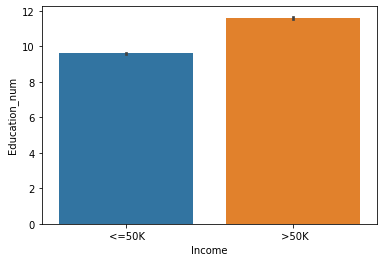

In [9]:
sns.barplot(x="Income",y="Education_num",data=df)

<AxesSubplot:xlabel='Income', ylabel='Age'>

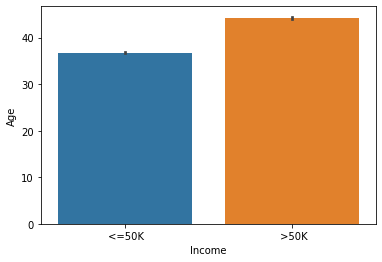

In [10]:
sns.barplot(x="Income",y="Age",data=df)

<AxesSubplot:xlabel='count', ylabel='Workclass'>

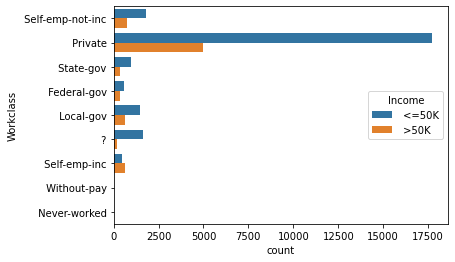

In [11]:
sns.countplot(y='Workclass', hue='Income', data = df)

<AxesSubplot:xlabel='count', ylabel='Occupation'>

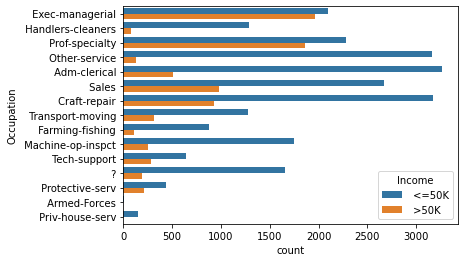

In [12]:
sns.countplot(y='Occupation', hue='Income', data = df)

LABEL ENCODER

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=["Workclass","Marital_status","Occupation","Relationship","Race","Sex","Native_country","Income"]
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))
df

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,13,2,4,0,4,1,0,0,13,39,0
1,38,4,9,0,6,1,4,1,0,0,40,39,0
2,53,4,7,2,6,0,2,1,0,0,40,39,0
3,28,4,13,2,10,5,2,0,0,0,40,5,0
4,37,4,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,9,4,1,3,4,1,0,0,20,39,0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Marital_status'}>],
       [<AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>,
        <AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>,
        <AxesSubplot:title={'center':'Native_country'}>],
       [<AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

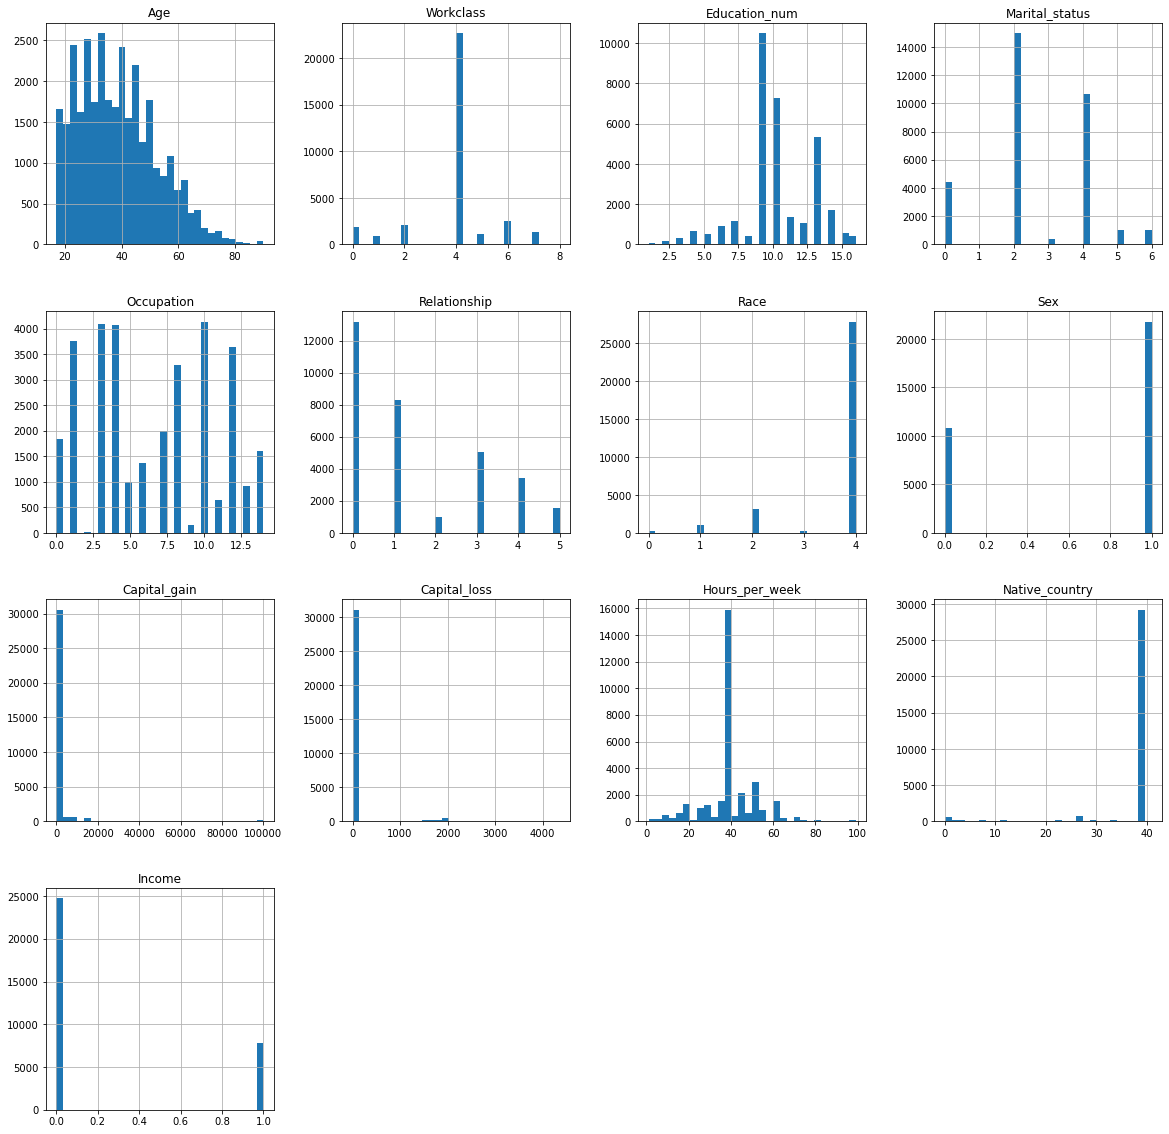

In [14]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [15]:
df.describe()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [16]:
df.skew()

Age                0.558738
Workclass         -0.752280
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

Age                 AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
Workclass         AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
Education_num     AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
Marital_status    AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
Occupation        AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
Relationship      AxesSubplot(0.619681,0.799681;0.0824468x0.0803...
Race              AxesSubplot(0.718617,0.799681;0.0824468x0.0803...
Sex               AxesSubplot(0.817553,0.799681;0.0824468x0.0803...
Capital_gain        AxesSubplot(0.125,0.703298;0.0824468x0.0803191)
Capital_loss      AxesSubplot(0.223936,0.703298;0.0824468x0.0803...
Hours_per_week    AxesSubplot(0.322872,0.703298;0.0824468x0.0803...
Native_country    AxesSubplot(0.421809,0.703298;0.0824468x0.0803...
Income            AxesSubplot(0.520745,0.703298;0.0824468x0.0803...
dtype: object

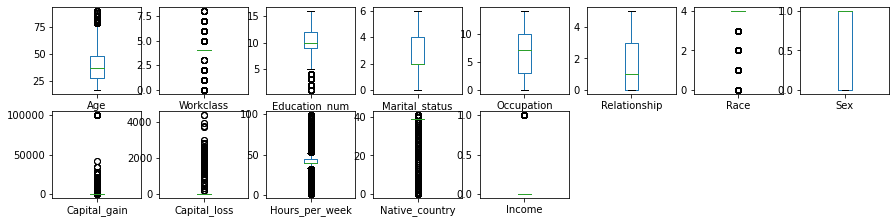

In [17]:
df.plot(kind="box",subplots=True,layout=(8,8),figsize=(15,15))

Z SCORE METHOD

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.83709708, 1.46388339, 1.13477863, ..., 2.22212013, 0.29157343,
        0.5632099 ],
       [0.04264043, 0.09012148, 0.42002663, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.05703146, 0.09012148, 1.19742926, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       ...,
       [1.42358875, 0.09012148, 0.42002663, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.21562378, 0.09012148, 0.42002663, ..., 1.65520046, 0.29157343,
        0.5632099 ],
       [0.98372   , 0.77700244, 0.42002663, ..., 0.03542999, 0.29157343,
        1.77553698]])

In [19]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,13,2,4,0,4,1,0,0,13,39,0
1,38,4,9,0,6,1,4,1,0,0,40,39,0
2,53,4,7,2,6,0,2,1,0,0,40,39,0
4,37,4,14,2,4,5,4,0,0,0,40,39,0
5,49,4,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,9,4,1,3,4,1,0,0,20,39,0


In [20]:
df.shape

(32560, 13)

In [21]:
27721/32560

0.8513820638820638

In [22]:
df.columns

Index(['Age', 'Workclass', 'Education_num', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [23]:
list=['Age', 'Workclass', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income']
for i in list:
    vc=df[i].value_counts()
    print(vc)

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64
4    22696
6     2541
2     2093
0     1836
7     1297
5     1116
1      960
8       14
3        7
Name: Workclass, dtype: int64
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64
2    14976
4    10682
0     4443
5     1025
6      993
3      418
1       23
Name: Marital_status, dtype: int64
10    4140
3     4099
4     4066
1     3769
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: Occupation, dtype: int64
0    13193
1     8304
3     5068
4     3446
5     1568
2      981
Name: Relationship, dtype: int64
4    27815
2     3124
1     1039
0      311
3      271
Name: Race, dtype: int64
1    21789
0

In [24]:
df.skew()

Age                0.558738
Workclass         -0.752280
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

BY USING LOG TRANSFORM METHOD TO REMOVE SKEWNESS

In [26]:
skew=("Age","Workclass","Race","Capital_gain","Capital_loss","Native_country")
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [27]:
df.skew()

Age              -0.113322
Workclass        -0.752280
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

CORRELATION GRAPH

In [28]:
df.corr()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.029845,0.073960,-0.323642,-0.007627,-0.286003,0.021535,0.104233,0.128895,0.057777,0.138767,-0.006957,0.268425
Workclass,0.029845,1.000000,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.022490,0.010596,0.138974,-0.007710,0.051645
Education_num,0.073960,0.052015,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.129055,0.077153,0.148127,0.050831,0.335182
Marital_status,-0.323642,-0.064798,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.066684,-0.035948,-0.190521,-0.023827,-0.199295
Occupation,-0.007627,0.255004,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.019970,0.018816,0.080384,-0.012532,0.075448
Relationship,-0.286003,-0.090449,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.083388,-0.057456,-0.248975,-0.005504,-0.250924
Race,0.021535,0.049720,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.024058,0.018358,0.041910,0.137849,0.071853
Sex,0.104233,0.095942,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.068956,0.042591,0.229312,-0.008125,0.215995
Capital_gain,0.128895,0.022490,0.129055,-0.066684,0.019970,-0.083388,0.024058,0.068956,1.000000,-0.066150,0.083834,0.005676,0.289548
Capital_loss,0.057777,0.010596,0.077153,-0.035948,0.018816,-0.057456,0.018358,0.042591,-0.066150,1.000000,0.051287,0.000440,0.141143


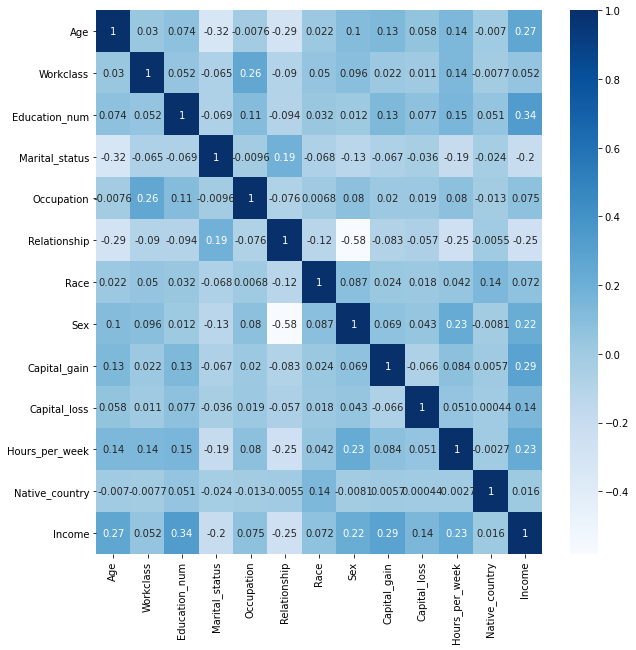

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

CHECKING FOR VIF FACTOR

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.iloc[:,df.columns != 'Income']
x

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,3.931826,6,13,2,4,0,4,1,0.000000,0.0,13,39
1,3.663562,4,9,0,6,1,4,1,0.000000,0.0,40,39
2,3.988984,4,7,2,6,0,2,1,0.000000,0.0,40,39
3,3.367296,4,13,2,10,5,2,0,0.000000,0.0,40,5
4,3.637586,4,14,2,4,5,4,0,0.000000,0.0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.332205,4,12,2,13,5,4,0,0.000000,0.0,38,39
32556,3.713572,4,9,2,7,0,4,1,0.000000,0.0,40,39
32557,4.077537,4,9,6,1,4,4,0,0.000000,0.0,40,39
32558,3.135494,4,9,4,1,3,4,1,0.000000,0.0,20,39


In [31]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [32]:
calc_vif(x)

,variable,VIF factor
0,Age,44.449542
1,Workclass,8.662952
2,Education_num,16.654479
3,Marital_status,3.927372
4,Occupation,3.699861
5,Relationship,2.604417
6,Race,18.984748
7,Sex,4.491375
8,Capital_gain,1.127163
9,Capital_loss,1.066840


In [33]:
df["Income"].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

SMOTE PROCESS -as our target column is imbalanced

In [34]:
dfx=df.iloc[:,df.columns != 'Income']
dfx

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,3.931826,6,13,2,4,0,4,1,0.000000,0.0,13,39
1,3.663562,4,9,0,6,1,4,1,0.000000,0.0,40,39
2,3.988984,4,7,2,6,0,2,1,0.000000,0.0,40,39
3,3.367296,4,13,2,10,5,2,0,0.000000,0.0,40,5
4,3.637586,4,14,2,4,5,4,0,0.000000,0.0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.332205,4,12,2,13,5,4,0,0.000000,0.0,38,39
32556,3.713572,4,9,2,7,0,4,1,0.000000,0.0,40,39
32557,4.077537,4,9,6,1,4,4,0,0.000000,0.0,40,39
32558,3.135494,4,9,4,1,3,4,1,0.000000,0.0,20,39


In [35]:
dfy=df.iloc[:,-1]
dfy

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [36]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(dfx,dfy)

In [37]:
trainx.value_counts()

Age       Workclass  Education_num  Marital_status  Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country
3.871201  4          9              2               3           0             4     1    0.0           0.000000      40              39                43
3.931826  4          9              2               3           0             4     1    0.0           0.000000      40              39                41
3.688879  4          9              2               3           0             4     1    0.0           0.000000      40              39                37
3.784190  4          9              2               3           0             4     1    0.0           0.000000      40              39                33
3.912023  4          9              2               3           0             4     1    0.0           0.000000      40              39                28
                                                                                  

In [38]:
trainy.value_counts()

1    24719
0    24719
Name: Income, dtype: int64

STANDARD SCALER

In [39]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
trainx=scale.fit_transform(trainx)

In [40]:
trainx

array([[ 0.80955387,  1.51330045,  0.95464393, ..., -0.26318914,
        -2.40188578,  0.2842363 ],
       [-0.03540361,  0.08513308, -0.60797192, ..., -0.26318914,
        -0.17640138,  0.2842363 ],
       [ 0.98958709,  0.08513308, -1.38927985, ..., -0.26318914,
        -0.17640138,  0.2842363 ],
       ...,
       [ 1.52842813, -1.34303429,  1.34529789, ..., -0.26318914,
        -0.58852812, -1.76456301],
       [ 1.04925147, -1.34303429, -0.60797192, ..., -0.26318914,
        -0.17640138,  0.02813639],
       [ 0.84657507,  0.08513308, -1.77993381, ..., -0.26318914,
        -0.17640138,  0.2842363 ]])

MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [58]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=i) 
    m=DecisionTreeClassifier()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=accuracy_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.8540992448759439 on random state 36


In [41]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=36)

In [60]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",accuracy_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    print(confusion_matrix(pred_test,y_test))
    print(classification_report(pred_test,y_test),"\n")

testing score= 0.7702265372168284
training score= 0.7684216609836445
[[5617 1646]
 [1762 5807]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      7263
           1       0.78      0.77      0.77      7569

    accuracy                           0.77     14832
   macro avg       0.77      0.77      0.77     14832
weighted avg       0.77      0.77      0.77     14832
 

testing score= 0.8543015102481122
training score= 0.986013986013986
[[6334 1116]
 [1045 6337]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7450
           1       0.85      0.86      0.85      7382

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832
 

testing score= 0.8391990291262136
training score= 0.8435531410738022
[[5814  820]
 [1565 6633]]
              precision    recall  f1-score   support



CROSS VALIDATION PROCESS

In [61]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model:
    score=cross_val_score(i,trainx,trainy,cv=10) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [0.75849515 0.76334951 0.76982201 0.76395631 0.76779935 0.77811489
 0.76779935 0.77710356 0.77260773 0.77220312]
mean_score= 0.7691250973067074
std= 0.005857862712809279 

score= [0.76840615 0.78216019 0.77953074 0.87095469 0.88228155 0.88470874
 0.88895631 0.88470874 0.88509003 0.87861622]
mean_score= 0.8505413371005515
std= 0.04866329679455057 

score= [0.8183657  0.81816343 0.8177589  0.83232201 0.84304207 0.84809871
 0.84789644 0.84991909 0.84806797 0.84584261]
mean_score= 0.8369476923661129
std= 0.013191455101571764 

score= [0.83090615 0.83636731 0.83919903 0.88572006 0.90331715 0.90331715
 0.90716019 0.90898058 0.9067368  0.90127453]
mean_score= 0.8822978966692789
std= 0.03129064416517622 

score= [0.81877023 0.81856796 0.82524272 0.84830097 0.85032362 0.8586165
 0.8592233  0.86751618 0.86445478 0.85474408]
mean_score= 0.8465760355757904
std= 0.017775061383249812 



HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameter={"criterion":["gini","entropy"],
          "splitter": ["best","random"],
          "max_features": ["auto","sqrt","log2"],
          "max_depth": np.arange(2,10)}

In [64]:
gcv=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [65]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [66]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'splitter': 'best'}

In [42]:
final_model=DecisionTreeClassifier(criterion="gini",max_depth=9,max_features="auto",splitter="best")
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(pred,y_test))

0.8234223300970874


AUC-ROC CURVE

In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [69]:
y_pred_prob=final_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.01321138, 0.86164363, 0.86164363, ..., 0.86164363, 0.62005055,
       0.        ])

In [70]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

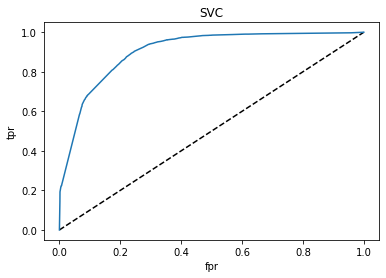

In [71]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="SVC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("SVC")
plt.show()

In [72]:
auc_score=roc_auc_score(y_test,final_model.predict(x_test))
auc_score

0.8282343213568729

SAVING THE BEST MODEL

In [73]:
import joblib

joblib.dump(final_model,"census_income.obj")

['census_income.obj']

In [74]:
censusincome_from_joblib=joblib.load("census_income.obj")
censusincome_from_joblib.predict(x_test)

array([0, 1, 1, ..., 1, 1, 0])